In [1]:
# %%
"""
#Classificação de digitos manuscritos com SVM
###material adaptado de:
https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

###Um bom tutorial:
https://towardsdatascience.com/support-vector-machine-mnist-digit-classification-with-python-including-my-hand-written-digits-83d6eca7004a
![](https://miro.medium.com/max/584/1*2lSjt9YKJn9sxK7DSeGDyw.jpeg)
"""

# %%
import matplotlib.pyplot as plt
# Importa datasets, classificadores e metricas
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



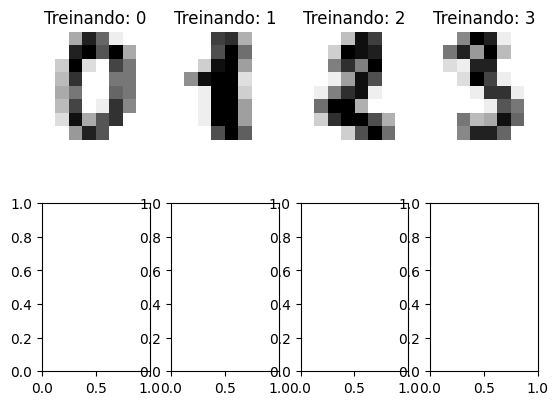

In [2]:
#carrega dataset de digitos.
digits = datasets.load_digits()


# %%
# os digitos são uma matriz de 8x8 .
# os numeros de 0 a 3 podem ser vistos abaixo

_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Treinando: %i' % label)



In [3]:
# %%
# alterando o shape da imagem para ficar na forma de vetor.
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


# %%
# Criando o classificador
# https://scikit-learn.org/stable/modules/svm.html
classifier = svm.SVC(gamma=0.001)

# dividindo dados para treinamento 50%...
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)



In [4]:
# Treinando
classifier.fit(X_train, y_train)



SVC(gamma=0.001)

In [5]:
# Realizando a predição
predicted = classifier.predict(X_test)



In [6]:
# %%
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Predição: %i' % prediction)



In [7]:
# %%
print("Relatório do classificador para cada dígito %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
print("Precisão da svm : ",accuracy_score(y_test, predicted))




Relatório do classificador para cada dígito SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


Precisão da svm :  0.9688542825361512


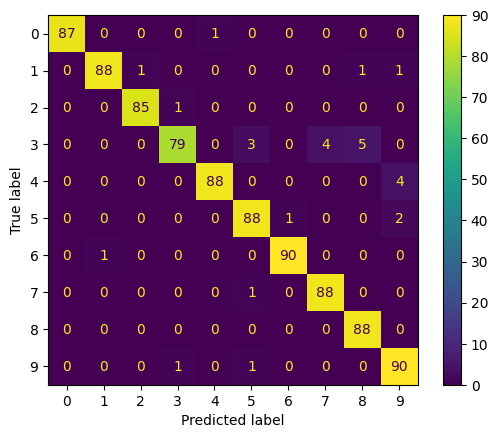

In [8]:
cm = confusion_matrix(y_test, predicted, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=classifier.classes_)
disp.plot()

plt.show()